In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

In [65]:
df_searches = pd.read_csv("../data/util/csv/completions.csv")
df_searches.head()

,query,completion
0,pediatric care,Pediatric care
1,specialized centers,Specialized clinics
2,child,Pediatric care
3,nuclear tests,Nuclear medicine
4,emergency medical clinic,Emergency medical care


In [66]:
df_searches_encoded = pd.read_csv("../data/processed/completions_encoded.csv")
df_searches_encoded.head()

,97,98,99,100,101,102,103,104,105,106,...,114,115,116,117,118,119,120,121,122,completion
0,2,0,1,1,2,0,0,0,2,0,...,0,3,2,0,0,0,0,0,0,1
1,2,0,1,0,3,0,1,0,2,0,...,3,0,2,0,0,0,0,0,0,3
2,3,0,2,0,1,0,1,1,2,0,...,1,3,1,0,0,0,0,1,0,0
3,2,0,1,1,2,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,1
4,1,1,1,0,3,0,0,1,0,0,...,2,0,1,0,0,0,0,0,0,13


## Data cluster visualization
t-SNE stands for t-distributed Stochastic Neighbor Embedding. It's a nonlinear dimensionality reduction technique used for visualizing high-dimensional data in a lower-dimensional space, typically 2D or 3D. It's used for visualizing clusters or groups in data. t-SNE works by converting similarities between data points in the high-dimensional space into probabilities. Then, it tries to minimize the difference between these probabilities in the high-dimensional space and the probabilities in the lower-dimensional space, usually using a cost function called the Kullback-Leibler divergence. In simpler terms, t-SNE helps to preserve the local structure of the data points in the original high-dimensional space while projecting them into a lower-dimensional space, making it easier to visualize clusters and patterns.

### Raw queries - TF-IDF encoding

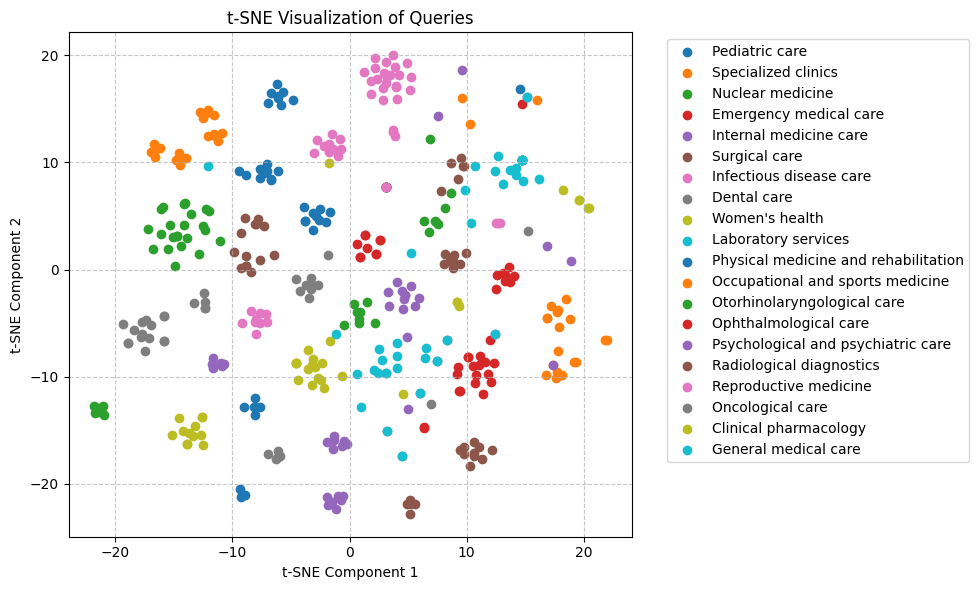

In [67]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_searches["query"])

# Apply t-SNE for dimensionality reduction.
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

plt.figure(figsize=(10, 6))
for label in df_searches["completion"].unique():
    indices = df_searches[df_searches["completion"] == label].index
    plt.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label=label)

plt.title("t-SNE Visualization of Queries")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show();

### KMeans Clustering

Cluster centers: [[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.02200034 0.29154308 0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


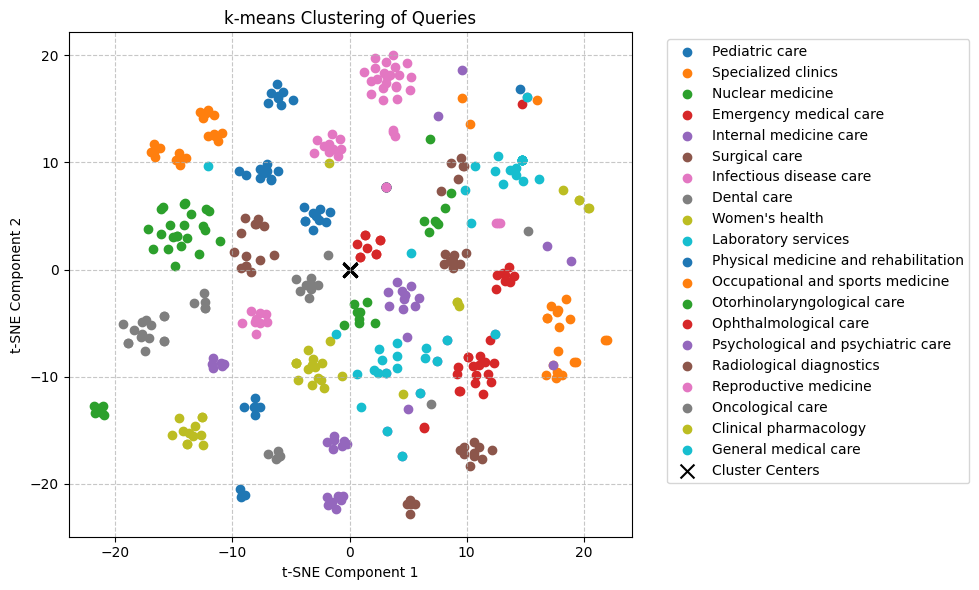

In [68]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df_searches["query"])

# Perform k-means clustering
model = KMeans(n_clusters=19, random_state=42)
model.fit(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

# Plotting
plt.figure(figsize=(10, 6))
for label in df_searches["completion"].unique():
    indices = df_searches[df_searches["completion"] == label].index
    plt.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label=label)

# Plotting cluster centers
print("Cluster centers:", model.cluster_centers_)  # Check cluster centers
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c="black", marker="x", label="Cluster Centers")

plt.title("k-means Clustering of Queries")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show();

### Encoded queries - ASCII encoding

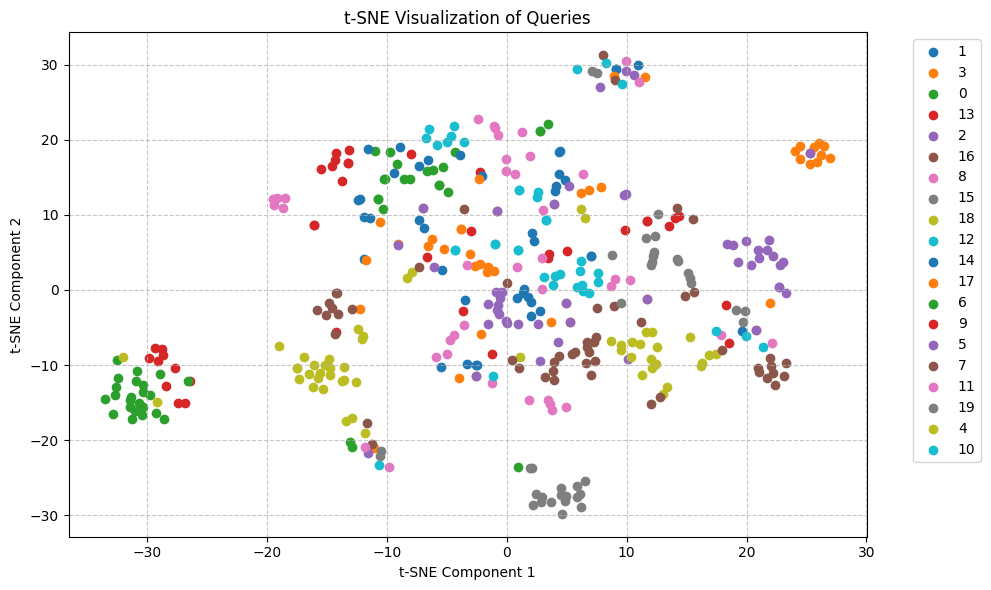

In [69]:
X = df_searches_encoded.drop(["completion"], axis=1)

scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply t-SNE for dimensionality reduction.
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

plt.figure(figsize=(10, 6))
for label in df_searches_encoded["completion"].unique():
    indices = df_searches_encoded[df_searches_encoded["completion"] == label].index
    plt.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label=label)

plt.title("t-SNE Visualization of Queries")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show();

### KMeans Clustering

Cluster centers: [[ 2.09375000e+00  6.25000000e-02  8.43750000e-01  3.75000000e-01
   3.31250000e+00  9.37500000e-02  1.56250000e-01  5.00000000e-01
   9.06250000e-01  0.00000000e+00  1.38777878e-17  7.81250000e-01
   1.12500000e+00  1.50000000e+00  5.00000000e-01  4.06250000e-01
   0.00000000e+00  1.90625000e+00  5.31250000e-01  3.59375000e+00
   2.18750000e-01  3.12500000e-02  3.12500000e-02  3.12500000e-02
   2.81250000e-01  6.93889390e-18]
 [ 1.50000000e+00  8.18181818e-01  1.36363636e-01  1.81818182e-01
   5.00000000e-01  1.38777878e-17  1.36363636e-01  2.27272727e-01
   2.27272727e-01  0.00000000e+00  4.54545455e-02  1.13636364e+00
   9.09090909e-02  9.09090909e-02  8.63636364e-01  1.81818182e-01
  -4.33680869e-19  6.81818182e-01  5.90909091e-01  8.63636364e-01
   4.54545455e-02  0.00000000e+00  4.54545455e-02 -6.93889390e-18
   1.81818182e-01  3.46944695e-18]
 [ 7.50000000e-01  0.00000000e+00  2.00000000e+00  1.00000000e+00
   3.25000000e+00  0.00000000e+00  2.50000000e-01  0.00

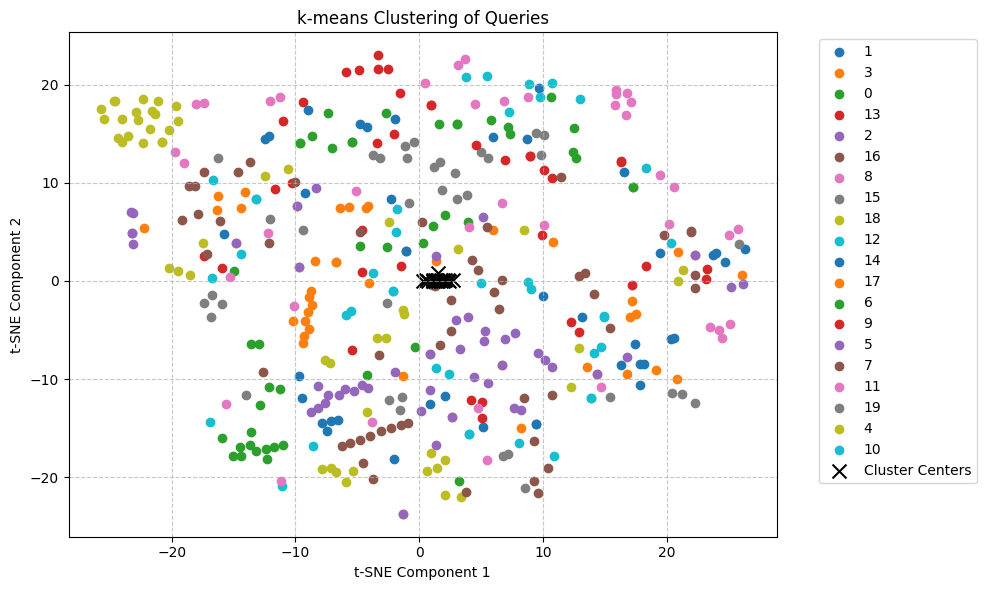

In [70]:
X = df_searches_encoded.drop(["completion"], axis=1)

# Perform k-means clustering
model = KMeans(n_clusters=19, random_state=42)
model.fit(X)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X)

# Plotting
plt.figure(figsize=(10, 6))
for label in df_searches_encoded["completion"].unique():
    indices = df_searches_encoded[df_searches_encoded["completion"] == label].index
    plt.scatter(X_embedded[indices, 0], X_embedded[indices, 1], label=label)

# Plotting cluster centers
print("Cluster centers:", model.cluster_centers_)  # Check cluster centers
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=100, c="black", marker="x", label="Cluster Centers")

plt.title("k-means Clustering of Queries")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True, linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show();